### Understand and Visualize Descriptive Statistics - with the help of Gaussian, Left-skewed, and Right-skewed Dataset :

**Introduction:**
The idea of this notebook is to understand and visulize the various descriptive statistics and more importantly to see how they changes when the underlying data distribution changes. So, we will begin with a normally distributed dataset and then we will change the distribution to m ake it left and right skewed data and see how the statistics changes. 

**Dataset:**
This data is about "Housefly Wing Lengths" and has been taken from <a href="https://seattlecentral.edu/qelp/sets/057/057.html"> Seattlecentral.edu </a> (`Sokal, R.R., and P.E.Hunter. 1955.`)
This is an excellent example of normally distributed data from the field of biometry.

**Approach**
We will run this notebook in two part:
 - **Part A: Understand all about descriptive statistics for a normally distributed dataset**
     - calculate and visualize the descriptive statistics
     - test for normal distribution
     - test for outliers
     - test if the distribution follow 68-95-99 rule with 1-2-3 sigma deviation
     
 - **Part B: Change the distributio to make it a left-skewed or negatively skewed dataset**
     - test for normal distribution (should fail the test)
     - see the impact on descriptive statistics/visualization (**`Mode > Median > Mean`**)
     - check for any outliers due to skewness
     
 - **Part C: Change the distributio to make it a right-skewed or positively skewed dataset**
     - test for normal distribution (should fail the test)
     - see the impact on descriptive statistics/visualization (**`Mode < Median < Mean`**) 
     - check for any outliers due to skewness

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro
import warnings
warnings.filterwarnings("ignore")

#### Part A: Understand all about descriptive statistics for a normally distributed dataset.
  1. calculate descriptive statistics (validate if `mean = median = mode`)
  2. test for normal distribution (Scipy `Shapiro-Wilk test`)
  3. test for outliers (`IQR Method and Z-score Method`)
  4. test if the distribution follow 68-95-99 rule with 1-2-3 sigma deviation

In [34]:
df = pd.read_excel("s057.xls")
print(df.shape)
print(df.info())

(100, 1)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   length  100 non-null    int64
dtypes: int64(1)
memory usage: 928.0 bytes
None


In [35]:
df.describe()

,length
count,100.000000
mean,45.500000
std,3.919647
min,36.000000
25%,43.000000
50%,45.500000
75%,48.000000
max,55.000000


**A1. Descriptive Statistics Definition**

In [36]:
# Create functions for descriptive Statistics
def measure_of_central_tendency(x):
    print("Mean, Median, and Mode are respectively:")
    return x.mean(), x.median(), 3*x.median()-2*x.mean()

def positional_statistics(x):
    print("Min, 10th Decile, IQR1, Median, IQR3, 90th Decile, and Max. are respectively:")
    return x.min(), round(x.quantile(.10),2), round(x.quantile(.25),2), round(x.quantile(.50),2), 
    round(x.quantile(.75),2), round(x.quantile(.90),2), x.max()

def measure_of_dispersion(x):
    print("Range, Inter Quartile Range, variance, and Std. devations are respectively:")
    return x.max()-x.min(), round((x.quantile(.75)-x.quantile(.25)),2), round(x.var(),2), round(x.std(),2)

def measure_of_shape(x):
    print("Skewness and Kurtosis coefficients are:")
    return round(x.skew(),2), round(x.kurt(),2)

**A2. Descriptive Statistics Summary and Visualization**

Summary of Descriptive Statistics:
----------------------------------
Mean, Median, and Mode are respectively:
(45.5, 45.5, 45.5)
Min, 10th Decile, IQR1, Median, IQR3, 90th Decile, and Max. are respectively:
(36, 40.9, 43.0, 45.5)
Range, Inter Quartile Range, variance, and Std. devations are respectively:
(19, 5.0, 15.36, 3.92)
Skewness and Kurtosis coefficients are:
(0.0, -0.29)


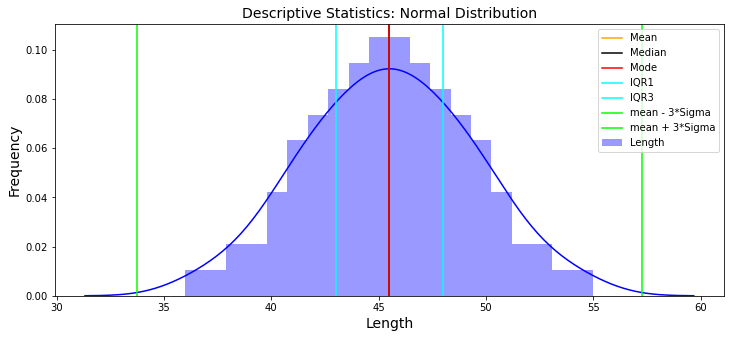

In [37]:
print("Summary of Descriptive Statistics:")
print("----------------------------------")
print(measure_of_central_tendency(df.length))
print(positional_statistics(df.length))
print(measure_of_dispersion(df.length))
print(measure_of_shape(df.length))

# Plot the graph
plt.figure(figsize=(12,5))
sns.distplot(df.length, bins=20, hist=True, kde=True, label = 'Length', color = "blue")
plt.axvline(df.length.mean(),color='orange',label='Mean')
plt.axvline(df.length.median(),color='black',label='Median')
plt.axvline(3*df.length.median()-2*df.length.mean(),color='red',label='Mode')
plt.axvline(df.length.quantile(0.25),color='cyan',label='IQR1')
plt.axvline(df.length.quantile(0.75),color='cyan',label='IQR3')
plt.axvline(df.length.mean() - 3*df.length.std(),color='lime',label= "mean - 3*Sigma")
plt.axvline(df.length.mean() + 3*df.length.std(),color='lime',label= "mean + 3*Sigma")
plt.title("Descriptive Statistics: Normal Distribution", fontsize =14)
plt.xlabel('Length', fontsize =14)
plt.ylabel('Frequency', fontsize =14)
plt.legend()
plt.show()

**We can observe that:**
 - `Mean = median = mode are overlapping with each other`justifying a perfectly normally distributed data.
 - we have a perfectly bell shaped curve

**A3. Test for Normal Distribution of Data**

We will use <a href = "https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html"> Scipy Shapiro-Wilk test </a> to test the normality of the dataset. This tests the null hypothesis that the data was drawn from a normal distribution. i.e.

 - H0: the data is normally distributed
 - H1: the data doesn't follow a normal distribution

In the SciPy implementation the p value can be interpreetd as follows:
 * p <= alpha: reject H0, not normally distributed. 
 * p > alpha: fail to reject H0, i.e. normally distributed

Broadly speaking , results with a larger p-value to confirm that our sample was likely drawn from a Gaussian distribution.

In [38]:
# Shapiro-Wilk Test for Normality
stat, p = shapiro(df.length)
print('Test Statistics = %.3f, and p-value is %.3f' % (stat, p))

# interpret results
alpha = 0.05
if p > alpha:
    print('Data is Normally Distributed (fail to reject H0 as p-value is > 0.05)')
else:
    print('Data is NOT Normally Distributed (reject H0 as p-value is < 0.05)')

Test Statistics = 0.993, and p-value is 0.876
Data is Normally Distributed (fail to reject H0 as p-value is > 0.05)


**A4. Check for Outliers**

We will use `IQR Method` as well as `Z-score` method to check if the data is normally distributed.

IQR Methos: No Outliers present in the data
3 Sigma Methods: No Outliers present in the data


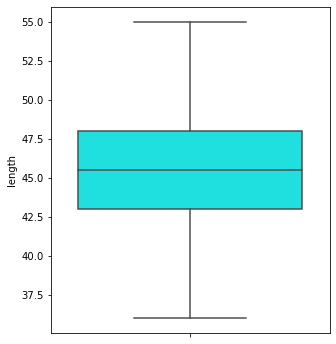

In [39]:
# Calculate some relavnt values
mn = df.length.min()
mx = df.length.max()
iqr1 = df.length.quantile(.25)
iqr3 = df.length.quantile(.75)
iqr = iqr3-iqr1
sd = df.length.std()
mean = df.length.mean()

# IQR Methods:
if((mn < iqr1 - 1.5*iqr) or (mx > iqr3 + 1.5*iqr)):
    print("IQR Methos: Outliers present in the data")        
else:
    print("IQR Methos: No Outliers present in the data")
    
# Z Methods (or 3 -Sigma Methods)

if((mn < (mean - 3*sd)) or (mx > (mean+3*sd))):
   print("3 Sigma Methods: Outliers present in the data")
else:
   print("3 Sigma Methods: No Outliers present in the data")

# Plot box plots to look for outliers
plt.figure(figsize=(5,6))
sns.boxplot(y = df.length, color = "cyan")
plt.show()

**A5. Validate if the distribution follow 68-95-99 rule with 1-2-3 sigma deviation**

In [40]:
def calculate_percentage(mean, sd, k):
    
    #calculate upper and lower vaue
    lower_limit = mean + k*sd
    upper_limit = mean - k*sd 
    
    # define the distribution
    dist = stats.norm(loc=mean, scale=sd)
           
    # Calculate area covered
    cdf_between_k_sigma = dist.cdf(lower_limit) - dist.cdf(upper_limit)
    return print("Area covered from mean with +/- %2d sigma is: %4.2f" % (k,round(cdf_between_k_sigma*100,2)))
   

calculate_percentage(df.length.mean(), df.length.std(), 1)
calculate_percentage(df.length.mean(), df.length.std(), 2) 
calculate_percentage(df.length.mean(), df.length.std(), 3)

Area covered from mean with +/-  1 sigma is: 68.27
Area covered from mean with +/-  2 sigma is: 95.45
Area covered from mean with +/-  3 sigma is: 99.73


### Part B: Change the data distributionto to make it a Left-skewed (or Negatively skewed) dataset

In [41]:
# Get a sense of 60th percentile data for left skew and 40th percentile for right skew ata
print(df.length.quantile(.60))

# force the normally distributed dataset to be a left-skewed dataset
df_left_skew = df.drop(df[df["length"] > df.length.quantile(.50)].index)

# check size of resulting df
print("Resulting dataframe shape is:", df_left_skew.shape)

#check the skew value to confirm that the data is really skewed now.
print("New Skew value is:", round(df_left_skew['length'].skew(),2))


46.4
Resulting dataframe shape is: (50, 1)
New Skew value is: -0.83


**B1. Normality test**    

In [42]:
# Run the Normality test on data - Shapiro-Wilk Test

stat, p = shapiro(df_left_skew.length)
print('Test Statistics = %.3f, and p-value is %.3f' % (stat, p))
# interpret results
alpha = 0.05
if p > alpha:
    print('Data is Normally Distributed (fail to reject H0 as p-value is > 0.05)')
else:
    print('Data is NOT Normally Distributed (reject H0 as p-value is < 0.05)')

Test Statistics = 0.911, and p-value is 0.001
Data is NOT Normally Distributed (reject H0 as p-value is < 0.05)


**B2. Changes in the Descriptive Statistics/Visualization**

Summary of Descriptive Statistics:
----------------------------------
Mean, Median, and Mode are respectively:
(42.34, 43.0, 44.31999999999999)
Min, 10th Decile, IQR1, Median, IQR3, 90th Decile, and Max. are respectively:
(36, 39.0, 41.0, 43.0)
Range, Inter Quartile Range, variance, and Std. devations are respectively:
(9, 3.0, 5.33, 2.31)
Skewness and Kurtosis coefficients are:
(-0.83, 0.13)


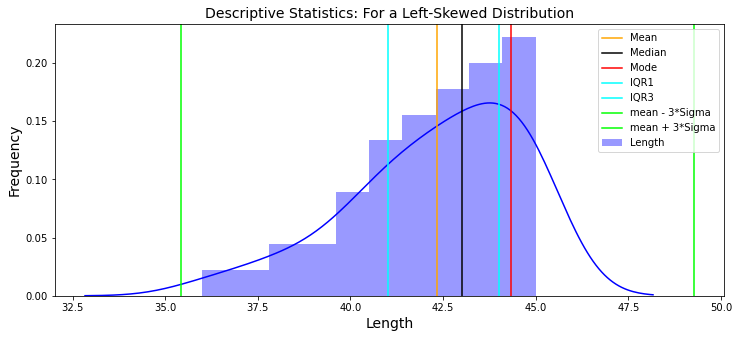

In [43]:
print("Summary of Descriptive Statistics:")
print("----------------------------------")
print(measure_of_central_tendency(df_left_skew.length))
print(positional_statistics(df_left_skew.length))
print(measure_of_dispersion(df_left_skew.length))
print(measure_of_shape(df_left_skew.length))

# Plot the graph now
plt.figure(figsize=(12,5))
sns.distplot(df_left_skew.length, bins=10, hist=True, kde=True, label = 'Length', color = "blue")
plt.axvline(df_left_skew.length.mean(),color='orange',label='Mean')
plt.axvline(df_left_skew.length.median(),color='black',label='Median')
plt.axvline(3*df_left_skew.length.median()-2*df_left_skew.length.mean(),color='red',label='Mode')
plt.axvline(df_left_skew.length.quantile(0.25),color='cyan',label='IQR1')
plt.axvline(df_left_skew.length.quantile(0.75),color='cyan',label='IQR3')
plt.axvline(df_left_skew.length.mean() - 3*df_left_skew.length.std(),color='lime',label= "mean - 3*Sigma")
plt.axvline(df_left_skew.length.mean() + 3*df_left_skew.length.std(),color='lime',label= "mean + 3*Sigma")
plt.title("Descriptive Statistics: For a Left-Skewed Distribution", fontsize =14)
plt.xlabel('Length', fontsize =14)
plt.ylabel('Frequency', fontsize =14)
plt.legend()
plt.show()

We can notice that:
- Mean, median, and mode are no more overlapping with each other.
- In fact, we can notice that `Mode> Median> Mean` - justifying a left or negatively skewed data.
- a long-left tail, hence the mean is also to the left of the peak and median is closer to third quartile.


**B3. Outliers check** 

IQR Methos: Outliers present in the data
3 Sigma Methods: No Outliers present in the data


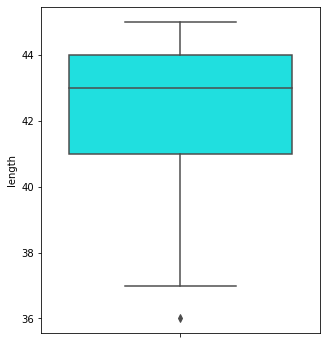

In [44]:
# Calculate some relavnt values
mn = df_left_skew.length.min()
mx = df_left_skew.length.max()
iqr1 = df_left_skew.length.quantile(.25)
iqr3 = df_left_skew.length.quantile(.75)
iqr = iqr3-iqr1
sd = df_left_skew.length.std()
mean = df_left_skew.length.mean()

# IQR Methods:
if((mn < iqr1 - 1.5*iqr) or (mx > iqr3 + 1.5*iqr)):
    print("IQR Methos: Outliers present in the data")        
else:
    print("IQR Methos: No Outliers present in the data")
    
# Z Methods (or 3 -Sigma Methods)

if((mn < (mean - 3*sd)) or (mx > (mean+3*sd))):
   print("3 Sigma Methods: Outliers present in the data")
else:
   print("3 Sigma Methods: No Outliers present in the data")

# Plot box plots to look for outliers
plt.figure(figsize=(5,6))
sns.boxplot(y = df_left_skew.length, color = "cyan")
plt.show()

We notice that we have an outlier detected by IQR method but not by z-score method. Please note that IQR method considers **+/- 2.7*Sigma** for outliers detection, whereas Z-score method check **+/- 3*Sigma** for outliers detection.

Refer this <a href="https://towardsdatascience.com/why-1-5-in-iqr-method-of-outlier-detection-5d07fdc82097"> Blog </a> for more details.

### Part C: Change the data distribution to make it a Right-skewed (or positively- skewed) dataset

In [50]:
# Get a sense of 60th percentile data for left skew and 40th percentile for right skew ata
print(df.length.quantile(.40))

# force the normally distributed dataset to be a right-skewed dataset
df_right_skew = df.drop(df[df["length"] < df.length.quantile(.50)].index)

# check size of resulting df
print("Resulting dataframe shape is:", df_right_skew.shape)

#check the skew value to confirm that the data is really skewed now.
print("New Skew value is:", round(df_right_skew['length'].skew(),2))

44.6
Resulting dataframe shape is: (50, 1)
New Skew value is: 0.83


**C1. Normality test**  

In [46]:
# Run the Normality test on data - Shapiro-Wilk Test

stat, p = shapiro(df_right_skew.length)
print('Test Statistics = %.3f, and p-value is %.3f' % (stat, p))
# interpret results
alpha = 0.05
if p > alpha:
    print('Data is Normally Distributed (fail to reject H0 as p-value is > 0.05)')
else:
    print('Data is NOT Normally Distributed (reject H0 as p-value is < 0.05)')

Test Statistics = 0.911, and p-value is 0.001
Data is NOT Normally Distributed (reject H0 as p-value is < 0.05)


**C2. Changes in the Descriptive Statistics/Visualization**

Summary of Descriptive Statistics:
----------------------------------
Mean, Median, and Mode are respectively:
(48.66, 48.0, 46.68000000000001)
Min, 10th Decile, IQR1, Median, IQR3, 90th Decile, and Max. are respectively:
(46, 46.0, 47.0, 48.0)
Range, Inter Quartile Range, variance, and Std. devations are respectively:
(9, 3.0, 5.33, 2.31)
Skewness and Kurtosis coefficients are:
(0.83, 0.13)


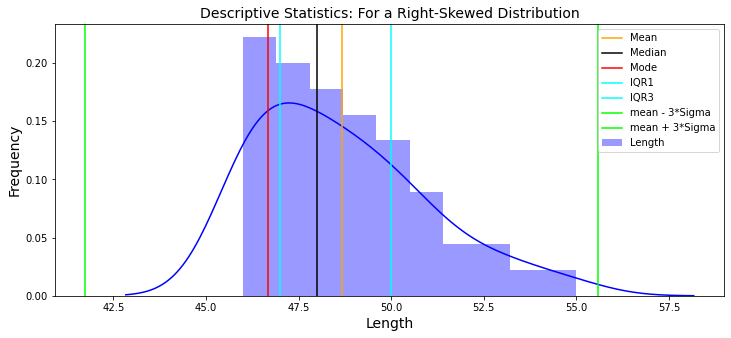

In [47]:
print("Summary of Descriptive Statistics:")
print("----------------------------------")
print(measure_of_central_tendency(df_right_skew.length))
print(positional_statistics(df_right_skew.length))
print(measure_of_dispersion(df_right_skew.length))
print(measure_of_shape(df_right_skew.length))

plt.figure(figsize=(12,5))
sns.distplot(df_right_skew.length, bins=10, hist=True, kde=True, label = 'Length', color = "blue")
plt.axvline(df_right_skew.length.mean(),color='orange',label='Mean')
plt.axvline(df_right_skew.length.median(),color='black',label='Median')
plt.axvline(3*df_right_skew.length.median()-2*df_right_skew.length.mean(),color='red',label='Mode')
plt.axvline(df_right_skew.length.quantile(0.25),color='cyan',label='IQR1')
plt.axvline(df_right_skew.length.quantile(0.75),color='cyan',label='IQR3')
plt.axvline(df_right_skew.length.mean() - 3*df_right_skew.length.std(),color='lime',label= "mean - 3*Sigma")
plt.axvline(df_right_skew.length.mean() + 3*df_right_skew.length.std(),color='lime',label= "mean + 3*Sigma")
plt.title("Descriptive Statistics: For a Right-Skewed Distribution", fontsize =14)
plt.xlabel('Length', fontsize =14)
plt.ylabel('Frequency', fontsize =14)
plt.legend()
plt.show()

We can observe that:
- Mean, median, and mode are no more overlapping with each other.
- In fact, we can notcie that **`Mode < Median < Mean`** - justifying a right or positively skewed data.
- a long right tail, hence the mean is also to the **right** of the peak.

**C3. Outliers check** 

IQR Methos: Outliers present in the data
3 Sigma Methods: No Outliers present in the data


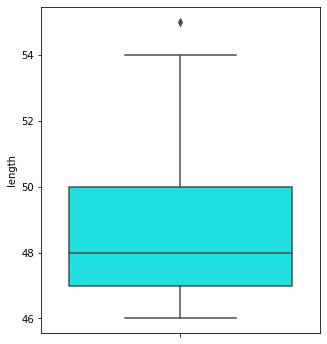

In [48]:
# Calculate some relavnt values
mn = df_right_skew.length.min()
mx = df_right_skew.length.max()
iqr1 = df_right_skew.length.quantile(.25)
iqr3 = df_right_skew.length.quantile(.75)
iqr = iqr3-iqr1
sd = df_right_skew.length.std()
mean = df_right_skew.length.mean()

# IQR Methods:
if((mn < iqr1 - 1.5*iqr) or (mx > iqr3 + 1.5*iqr)):
    print("IQR Methos: Outliers present in the data")        
else:
    print("IQR Methos: No Outliers present in the data")
    
# Z Methods (or 3 -Sigma Methods)

if((mn < (mean - 3*sd)) or (mx > (mean+3*sd))):
   print("3 Sigma Methods: Outliers present in the data")
else:
   print("3 Sigma Methods: No Outliers present in the data")

# Plot box plots to look for outliers
plt.figure(figsize=(5,6))
sns.boxplot(y = df_right_skew.length, color = "cyan")
plt.show()

We notice that we have an outlier detected by IQR method but not by z-score method. Please note that IQR method considers **+/- 2.7*Sigma** for outliers detection, whereas Z-score method check **+/- 3*Sigma** for outliers detection.

Refer this <a href="https://towardsdatascience.com/why-1-5-in-iqr-method-of-outlier-detection-5d07fdc82097"> Blog </a> for more details.